# Linear Regression

YT Video 1 - https://www.youtube.com/watch?v=PaFPbb66DxQ&list=PLblh5JKOoLUICTaGLRoHQDuF_7q2GfuJF&index=9

YT Video 2 - https://www.youtube.com/watch?v=7ArmBVF2dCs&list=PLblh5JKOoLUICTaGLRoHQDuF_7q2GfuJF&index=10

### Fitting a Line to Data
* Process of drawing a single straight line on a graph that best represents the overall trend of a set of data points

After you've done an experiment and collected your data, plotting it on a graph can show you if there's a relationship between your variables. A line helps to summarize this relationship. However, there are many possible lines you could draw, so we need a way to find the very best one.

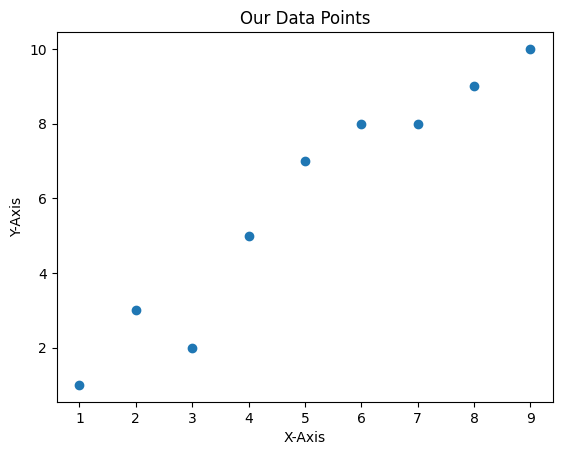

In [1]:
import matplotlib.pyplot as plt 

# Simple data 
x_values = [1, 2, 3, 4, 5, 6, 7, 8, 9]
y_values = [1, 3, 2, 5, 7, 8, 8, 9, 10]

# Let's plot the data points
plt.scatter(x_values, y_values)
plt.title("Our Data Points")
plt.xlabel("X-Axis")
plt.ylabel("Y-Axis")
plt.show()

### Measuring how well a line fits
* To determine the "best" line, we need a way to measure how close each data point is to that line. The vertical distance from a data point to the line is called a **residual**.

Let's start with a very simple (probably not the best) line: a horizontal line that cits through the average (b) of all our y-values. The equation of this line would be `y = b`. We can measure the distance from each point to this line by calculating `b - y` for each point

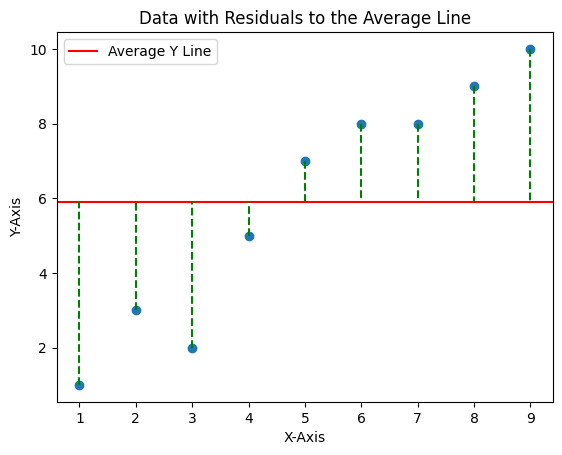

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 

x_values = [1, 2, 3, 4, 5, 6, 7, 8, 9]
y_values = [1, 3, 2, 5, 7, 8, 8, 9, 10]

# Calculate the average of the y-values
b = np.mean(y_values)

# Plot the data and the horizontal line
plt.scatter(x_values, y_values)
plt.axhline(y=b, color='red', linestyle='-', label = 'Average Y Line')

# Draw the residuals
for i in range(len(x_values)):
    plt.plot([x_values[i], x_values[i]], [y_values[i], b], 'g--')

plt.title("Data with Residuals to the Average Line")
plt.xlabel("X-Axis")
plt.ylabel("Y-Axis")
plt.legend()
plt.show()

### The Problem with Negative Values and The Solution: Least Squares
* The **"Least Squares"** method is how we find the best-fitting line. It's called this because it minimizes the **sum of the squared residuals**

If we just add up the residuals, some points are above the line (giving a negative residual) and some are below (giving a positive residual). These can cancel each other out, which doesn't give us a true measure of the total distance. To fix this, we square each residual before adding them up. Squaring makes every value positive. The line that results in the smallest possible sum of these squared distances is our best-fitting line.

In [3]:
import numpy as np

y_values = [1, 3, 2, 5, 7, 8, 8, 9, 10]
b = np.mean(y_values)

# Calculate the residuals
residuals = b - np.array(y_values)

# Square of each residual
squared_residuals = residuals**2

# Sum of the squared residuals
sum_of_squared_residuals = np.sum(squared_residuals)

print(f"Residuals: {residuals}")
print(f"Squared Residuals: {squared_residuals}")
print(f"Sum of Squared Residuals for the horizontal line: {sum_of_squared_residuals}")

Residuals: [ 4.88888889  2.88888889  3.88888889  0.88888889 -1.11111111 -2.11111111
 -2.11111111 -3.11111111 -4.11111111]
Squared Residuals: [23.90123457  8.34567901 15.12345679  0.79012346  1.2345679   4.45679012
  4.45679012  9.67901235 16.90123457]
Sum of Squared Residuals for the horizontal line: 84.88888888888887


### Finding the Optimal Line (Linear Regression)
* **Linear Regression** is the name of the process that finds the optimal values for the slope and intercept of the best-fitting line by using the Least Squares method.

Any sloped line can be described by the equation `y = a*x + b`, where a is the slope and b is the y-intercept. Linear Regression systematically tries different values for a and b to find the specific combination that produces the least sum of squared residuals. While this is complex to do by hand (it requires calculus), computers can do it very quickly.

### **Relevant Scikit-learn Components**

The entire process described in the video is handled by the `LinearRegression` model in the scikit-learn library. It's the practical tool you'll use to perform these calculations.

*   **`sklearn.linear_model.LinearRegression`**: This is the main component. When you use it, you are telling the computer to find the best-fitting line for your data using the Least Squares method.

    *   **`.fit(X, y)`**: This is the "training" step. You give it your `X` and `y` data, and it performs the calculations to find the optimal slope (`a`) and intercept (`b`).
    *   **`.coef_`**: After fitting, this attribute will hold the value of the slope (`a`).
    *   **`.intercept_`**: This attribute will hold the value of the y-intercept (`b`).
    *   **`.predict(X)`**: Once the model is fit, you can use this to predict the `y` value for any given `x` value based on the line it found.

The best slope (a) is: 1.15
The best intercept (b) is: 0.14


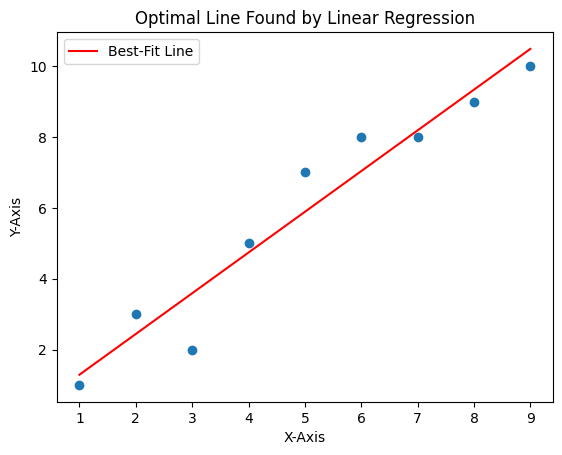

In [6]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Our data (needs to be in a specific shape for scikit-learn)
x_values = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9]).reshape(-1, 1)
y_values = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10])

# Create the model
model = LinearRegression()

# Fit the model to the data (least squares method)
model.fit(x_values, y_values)

# Get the results
slope_a = model.coef_[0]
intercept_b = model.intercept_

print(f"The best slope (a) is: {slope_a:.2f}")
print(f"The best intercept (b) is: {intercept_b:.2f}")

# Plot the final best-fit line
plt.scatter(x_values, y_values)
plt.plot(x_values, model.predict(x_values), color='red', label='Best-Fit Line')
plt.title("Optimal Line Found by Linear Regression")
plt.xlabel("X-Axis")
plt.ylabel("Y-Axis")
plt.legend()
plt.show()

### Quantifying the Fit with R-Squared (R²)

R-squared (R²) is the superstar statistic that tells us how much of the variation in our data is "explained" by our model.

To understand R², we compare two scenarios:

* **The "No-Model" Model (The Mean):** If you knew nothing about mouse weight and had to guess a mouse's size, your best bet would be the *average size* of all the mice. The variation of the data points around this simple average line represents the **Total Variation**. We'll call the sum of its squared residuals **`SS(mean)`**. This is our baseline error.

* **Our "Least-Squares" Model (The Fit):** This is the cool diagonal line we fit to the data. The variation that's *left over*—the variation our model *couldn't* explain—is represented by the residuals around this line. We call the sum of these squared residuals **`SS(fit)`**.

R² simply measures the percentage of the total variation that was eliminated by using our fitted line. It's the reduction in variance we get by taking mouse weight into account. If R² = 0.6, it means we've explained 60% of the variation in mouse size just by knowing the mouse's weight.

**R² = ( SS(mean) - SS(fit) ) / SS(mean) )**


### Overfitting and the Trouble wtih R²

R²'s major flaw : it almost always goes up when you add more variables to your model, even if they are useless. For exmaple if we try to "improve" our model by adding the result of a coin flip for each mouse: `Mouse Size = 0.3 + (mouse weight) + (flip of a coin)`. Just by random chance, the coin flip might slightly align with the data, making the SS(fit) a tiny bit smaller and thus increasing R². This is called **overfitting**

### Adjusted R²

To combat this, we use **Adjusted R²**. This metric adjusts the R² value downwards for every extra parameter you add.
* If you add a useful parameter, Adjusted R² will increase.
* If you add a useless parameter (like a coin flip), Adjusted R² will decrease.

In [2]:
import numpy as np 
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# Mouse Data
X = np.array([[1.0], [1.5], [2.2], [3.1], [3.5], [4.5], [5.5], [6.0]])
y = np.array([2.1, 2.8, 3.1, 4.2, 4.4, 5.8, 6.4, 6.9])

# Standard R-squared from scikit-learn
model = LinearRegression().fit(X,y)
r_squared_sklearn = model.score(X, y)
print("Standard R-squared from scikit-learn:", r_squared_sklearn)

# Statistical summary from statsmodels
X_with_constant = sm.add_constant(X)
model_sm = sm.OLS(y, X_with_constant)
results = model_sm.fit()

# Summary table has all the info
print("Summary table from statsmodels:")
print(results.summary())

Standard R-squared from scikit-learn: 0.9914000259819455
Summary table from statsmodels:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     691.7
Date:                Wed, 06 Aug 2025   Prob (F-statistic):           1.99e-07
Time:                        14:20:32   Log-Likelihood:                 3.6702
No. Observations:                   8   AIC:                            -3.340
Df Residuals:                       6   BIC:                            -3.181
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------

### The P-value as a Measure of Statistical Significance

A high R² is great, but we need to know if it's statistically significant. Could we have gotten a result this good just by random chance? The **p-value** answers this.
* The p-value comes from a test that uses the **F-statistic**. The F-statistic is a simple ratio:

**F = (Variation Explained by the extra parameters) / (Variation NOT Explained by the extra parameters)**
* A large F-statistic means our model explained a lot of variation compared to what's left over. This is what we want.

The p-value then answers the question: "Assuming there was NO real relationship, what is the probability of getting an F-statistic this large or larger?"
* A small p-value (typically < 0.05) means it's very unlikely our result is a random fluke. We can conclude the relationship is statistically significant.
* A large p-value means it's plausible that random chance created the pattern we see, so we cannot trust the relationship.

### Degrees of Freedom

The calculation of the p-value uses degrees of freedom (df) to account for the number of data points (n) and the number of parameters (p) in our model.

* Numerator df (p_fit - p_mean): The number of extra parameters used in the fit compared to the mean. For a simple line, this is 1 (we added the slope parameter).
* Denominator df (n - p_fit): The amount of data left over to estimate the error after fitting the model parameters.

In [4]:
# Pull out the most important values for our final conclusion
r_squared = results.rsquared
p_value = results.f_pvalue

print("Final Analysis")
print("R-squared: ", r_squared)
print(f"p-value: ", p_value)

# combines both
if r_squared > 0.7 and p_value < 0.05:
    print("The relationship is strong (high R-squared) AND reliable (low p-value).")
else:
    print("\nConclusion: Be careful. The relationship is either weak or not statistically reliable.")

Final Analysis
R-squared:  0.9914000259819455
p-value:  1.994100434454643e-07
The relationship is strong (high R-squared) AND reliable (low p-value).
